# Taller de analisis de la regresión lineal

La idea de este taller es que repase conceptos vistos sobre la regresión lineal. Explorando la solución de mínimos cuadrados (1),  verificando las variables de relevancia para el modelo (2) y evaluando la bondad de ajuste(3).

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.metrics import r2_score

## 1.) Cree un conjunto de datos

Cree un conjunto de datos con Q variables lienalmente dependiente y P variables ALEATORIAS (M = Q+P), grafique la variable de respuesta con base en algunos de sus regresores (considere regresores del conjunto Q y P)

In [61]:
def create_data(n_samples, P, Q):
  M = P + Q
  X = np.random.randn(n_samples, M)
  X_q = X[:,-Q:]
  beta = np.random.rand(Q,1)+0.5
  y = (X_q@beta).T + 1*np.random.rand(n_samples)
  return (X,y[0])




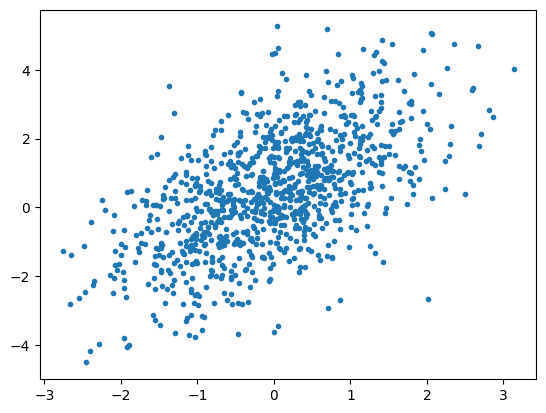

In [62]:
X,y = create_data(1000,10,3)


plt.plot(X[:,-1],y,'.')

## 2.)Diseño experimental

Plantee un experimento para identificar regresores relevantes y generar la mejor estimación posible sobre su variable Y, considere el particionamiento de datos y las validaciones correspondiente.

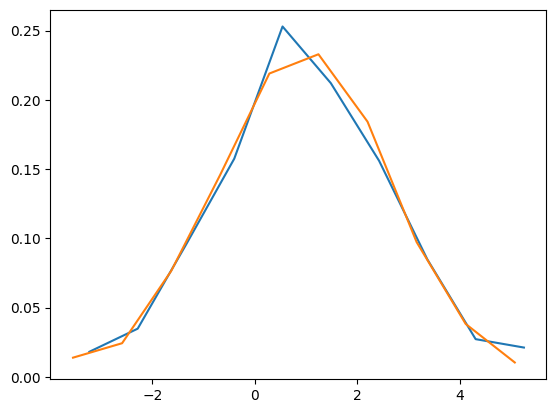

In [63]:
#r2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_hist, x_values_train = np.histogram(y_train, density=True)
test_hist, x_values_test = np.histogram(y_test, density=True)

plt.plot(x_values_train[1:], train_hist)
plt.plot(x_values_test[1:], test_hist)

X train: (300, 12)
Y train: (300,)
X test: (700, 12)
Y test: (700,)


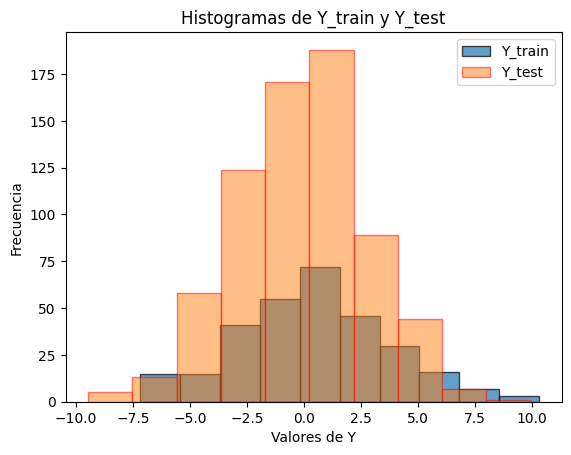

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.7)
print(f"X train: {X_train.shape}")
print(f"Y train: {Y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"Y test: {Y_test.shape}")

hist_train, bin_edges_train = np.histogram(Y_train, bins=10)

# Calcular el histograma de Y_test
hist_test, bin_edges_test = np.histogram(Y_test, bins=10)

# Crear el histograma en el mismo plot
plt.bar(bin_edges_train[:-1], hist_train, width=np.diff(bin_edges_train), 
        edgecolor="black", align="edge", alpha=0.7, label='Y_train')
plt.bar(bin_edges_test[:-1], hist_test, width=np.diff(bin_edges_test), 
        edgecolor="red", align="edge", alpha=0.5, label='Y_test')


plt.title('Histogramas de Y_train y Y_test')
plt.xlabel('Valores de Y')
plt.ylabel('Frecuencia')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## 3.)Solución por el metodo de minimos cuadrados

Solucione el modelo por mínimo cuadrado (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), compare el histograma de los coeficientes correspondiente a los regresores del conjunto Q y P.

In [64]:

reg= LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

## 4.) P values y selección de variables

Extraiga el P-value de cada unos de los parámetros (consulte: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), ¿como se comporta en los conjuntos Q y P?

recuerde:

$var(\beta) = \sigma_{y} * (X^T X)^-1$

In [65]:
cov = np.std(y_train) * np.linalg.inv(X_train.T@X_train)
var = np.diag(cov) 
std = var**0.5
z = reg.coef_/std
p = norm.sf(abs(z))*2  
print (p<0.05)

[False False False False False False False False False False  True  True
  True]


## 5.) Pruebe el modelo

Usando los regresores que superar la prueba de Wald ajuste un nuevo modelo lineal, mida su desempeño

In [68]:
X_train_ = X_train[:,p<0.05]
X_test_ = X_test[:,p<0.05]

reg_final = LinearRegression()
reg_final.fit(X_train_, y_train)
y_ = reg_final.predict(X_test_)

0.9680819758270539


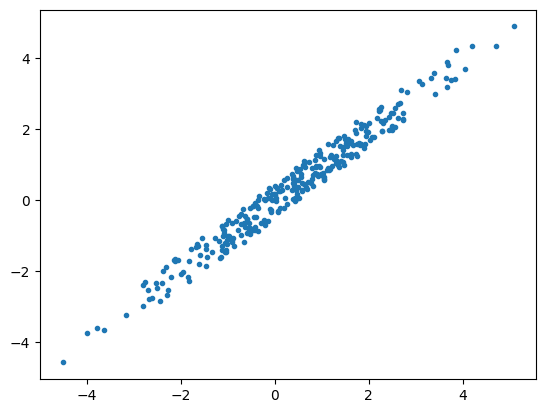

In [69]:
r2 = r2_score(y_test,y_)
print(r2)
plt.plot(y_test,y_,'.')